In [99]:
import pandas as pd
import numpy as np
df = pd.read_csv('bondtrain2.csv', parse_dates = True)
dfTest = pd.read_csv('bondtest.csv', parse_dates = True)

In [100]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report

convert categorical data into numeric is by using indicator vectors.

## Training Set Indicator Vectors

In [101]:
df['MISDEMEANOR'] = np.where(df['OFFENSENEW'] == 'M', 1, 0)
df['FELONY'] = np.where(df['OFFENSENEW'] == 'F',  1, 0)
df['OTHER OFF'] = np.where(df['OFFENSENEW'] == 'Other',  1, 0)

In [102]:
df['WHITE']  = np.where(df['RACE'] == 'WHITE', 1, 0)
df['BLACK']  = np.where(df['RACE'] == 'BLACK', 1, 0)
df['HISPANIC']  = np.where(df['RACE'] == 'HISPANIC', 1, 0)
df['ASIAN']  = np.where(df['RACE'] == 'ASIAN', 1, 0)
df['AMER IND']  = np.where(df['RACE'] == 'AMER IND', 1, 0)

In [103]:
df['MALE'] = np.where(df['GENDER'] == 'M', 1, 0)
df['FEMALE'] = np.where(df['GENDER'] == 'F',  1, 0)

### Removing unnecessary columns in the training set

In [104]:
df1 = df.drop(['GENDER','RACE','Unnamed: 0','OFFENSE','OFFENSENEW','BOND.BUCKET','FACILITY','DETAINER'], axis = 1)

## Testing Set Indicator Vectors

In [105]:
dfTest['MISDEMEANOR'] = np.where(dfTest['OFFENSENEW'] == 'M', 1, 0)
dfTest['FELONY'] = np.where(dfTest['OFFENSENEW'] == 'F',  1, 0)
dfTest['OTHER OFF'] = np.where(dfTest['OFFENSENEW'] == 'Other',  1, 0)

In [106]:
dfTest['WHITE']  = np.where(dfTest['RACE'] == 'WHITE', 1, 0)
dfTest['BLACK']  = np.where(dfTest['RACE'] == 'BLACK', 1, 0)
dfTest['HISPANIC']  = np.where(dfTest['RACE'] == 'HISPANIC', 1, 0)
dfTest['ASIAN']  = np.where(dfTest['RACE'] == 'ASIAN', 1, 0)
dfTest['AMER IND']  = np.where(dfTest['RACE'] == 'AMER IND', 1, 0)

In [107]:
dfTest['MALE'] = np.where(dfTest['GENDER'] == 'M', 1, 0)
dfTest['FEMALE'] = np.where(dfTest['GENDER'] == 'F',  1, 0)

### Removing unnecessary columns in the testing set

In [108]:
dfTest1 = dfTest.drop(['GENDER','RACE','Unnamed: 0','OFFENSE','BOND.BUCKET','OFFENSENEW','FACILITY','DETAINER'], axis = 1)

# Training the model and setting the amount of neighbors

In [109]:
from sklearn.model_selection import train_test_split
X_train = df1[:][['WHITE','BLACK','HISPANIC','ASIAN','AMER IND','MALE','FEMALE','AGE','MISDEMEANOR','FELONY','OTHER OFF']]
y_train = df1[:]['BOND.AMOUNT']

X_test = dfTest1[:][['WHITE','BLACK','HISPANIC','ASIAN','AMER IND','MALE','FEMALE','AGE','MISDEMEANOR','FELONY','OTHER OFF']]
y_test = dfTest1[:]['BOND.AMOUNT']



In [110]:
#Set the nearest neighbors to 3
knn = 𝚗𝚎𝚒𝚐𝚑𝚋𝚘𝚛𝚜.𝙺𝙽𝚎𝚒𝚐𝚑𝚋𝚘𝚛𝚜𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚎𝚛(n_neighbors = 11) 

In [111]:
y_test = pd.to_numeric(dfTest1['BOND.AMOUNT'], downcast='integer')
y_train = pd.to_numeric(df1['BOND.AMOUNT'], downcast='integer')

In [112]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

In [113]:
prediction = knn.fit(X_train, y_train).predict(X_test)

# Regression Evaluation Metrics
Can't look at accuracy when doing a regression

In [114]:
#Find the MSE
from sklearn.metrics import mean_squared_error, r2_score
#the r2 score is the correlation between the dependent variable 
#and the set of independent variables (higher = better)
mse =mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)

Mean Squared Error: 667547.0915313718


In [115]:
#RMSE ; rmse = math.sqrt(mse)
import math
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
#This is how much we are off by
#look at the range of the targets numbers so that we can see how significant the prediction would be 
#Max and min bond amount in our data set is 1 and 758

Root Mean Squared Error: 817.035550959303


k = 1, 1035.3917085443968

k = 3, 586.848390571679

k = 5, 698.6281547537583

k = 7, 744.7194554469912

k = 9, 807.9662325354424

k = 11, 817.035550959303

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

## Plot the error values against the k values

In [116]:
errors = [1035.3917085443968,586.848390571679, 698.6281547537583, 744.7194554469912, 807.9662325354424, 817.035550959303]
ks = [1,3,5,7,9,11]

Text(0, 0.5, 'Root Mean Square Error')

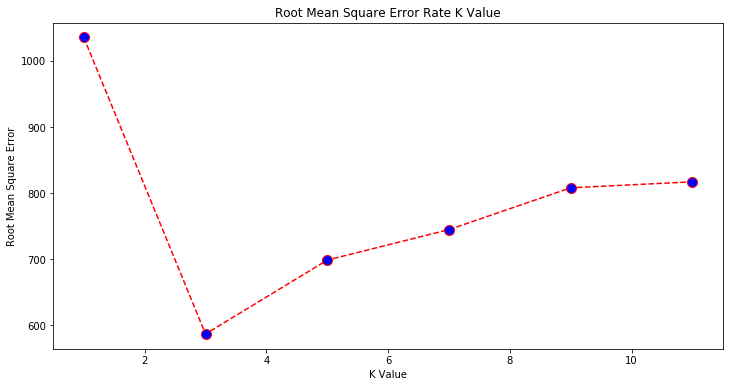

In [117]:
plt.figure(figsize=(12, 6))
plt.plot( ks, errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Root Mean Square Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Root Mean Square Error')